<a href="https://colab.research.google.com/github/cedro3/CLIPasso/blob/main/CLIPasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title セットアップ（数分くらい掛かります）

# cudaバージョンセレクト（10.1）
%cd /usr/local/
!pwd
!ls
!rm -rf cuda
!ln -s /usr/local/cuda-10.1 /usr/local/cuda
!stat cuda
!nvcc --version

# githubからコードを取得
%cd /content/
!git clone https://github.com/cedro3/CLIPasso.git
%cd CLIPasso

# ライブラリー・インストール
!pip install -r requirements.txt
!pip install --upgrade gdown ###
!pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 -f https://download.pytorch.org/whl/torch_stable.html

%cd /content/CLIPasso
!git pull

# CLIP, diffvrのインストール
%cd /content/CLIPasso
!pip install git+https://github.com/openai/CLIP.git
!git clone https://github.com/BachiLi/diffvg
%cd diffvg
!git submodule update --init --recursive
!python setup.py install


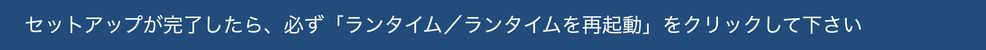

In [ ]:
#@title スケッチの作成
%cd /content/CLIPasso
!git pull

%matplotlib inline
target_image = "camel.png" #@param {"type": "string"}
num_sketch =  3#@param {"type": "integer"}
mask_object = 0 #@param {"type": "integer"}
fix_scale = 0 #@param {"type": "integer"}
num_strokes =  16#@param {"type": "integer"}

%run run_object_sketching.py --target_file $target_image\
                             --num_sketches $num_sketch\
                             --mask_object $mask_object\
                             --fix_scale $fix_scale\
                             --num_strokes $num_strokes\
                             -colab


In [ ]:
#@title 画像表示
%run display_results.py --target_file $target_image

In [ ]:
#@title 動画表示

import glob
import cv2
from function import *

# imagesフォルダ・リセット
reset_folder('images')

# target_imageの高さ調整
base = cv2.imread('target_images/'+target_image)
height, width, c = base.shape
width = int(width*448/height)
base = cv2.resize(base, dsize=(width,448))

# target_img + svg_to_png --> images
files = sorted(glob.glob(f"{cur_path}/svg_to_png/*.png"))
for i, file in enumerate(files):
  img = cv2.imread(file)
  concat_img = cv2.hconcat([base, img])
  cv2.imwrite('images/'+str(i).zfill(6)+'.png', concat_img)

# 動画の作成
!ffmpeg -y -r 10 -i images/%6d.png -vcodec libx264 -pix_fmt yuv420p -loglevel error output.mp4

# 動画の再生
display_mp4('output.mp4')